# 1. Import modules

In [1]:
import yfinance as yf
import share_tracking as share
import performance_calcs as calc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from importlib import reload  
import graphs as graph

# 2. User input
Location of CSV file of portfolio data:

In [2]:
filename = 'sample_portfolio.csv'

Share index to compare to:

In [3]:
# 'SPY' tracks the S&P500 index
index = 'SPY'

# 3. Get stock data 
Get stock data from API and merge with purchase data from csv file 

In [4]:
# Read user portfolio and convert to Dataframe
user_portfolio = share.get_userdata(filename)
# Get stock price data and merge with user data
merged_portfolio = share.merge_pricedata(user_portfolio, index)


API call in progress...

API call complete



# 4. Calculate portfolio performance metrics 

Perform basic processing and calculations on the data.

In [5]:
# Perform initial processing of portfolio data
portfolio = share.process_data(merged_portfolio)
# Extract variables for performance calculations
val, cash_flows, price, accum, shares = share.extract_parameters(portfolio)

# 5. Report a summary table of the portfolio

Can specify a start date for the portfolio, otherwise if 'start_date = None' the starting date is the first purchase date of the portfolio.<br> 
start_date can be a full string in 'YYYYMMDD' format or partial string as accepted by a Datetime Index, eg `'20210415'` or `'2018'` or `'2018-06'`

In [13]:
start_date = None

Create portfolio and index summary tables

In [14]:
summary = share.stock_summary(cash_flows, shares, price, accum, val, index, date=start_date)   
summary

Company,Average Price,Current Price,Current Holdings,Current Value,Daily Return (%),Total Return (%),Annualised Return (%),Time Weighted Return (%),Annualised Time Weighted Return (%)
BHP,,58.18,280,16290.40,-4.62,-0.18,-0.08,-0.18,-0.08
CSCO,,49.06,170,8340.20,0.02,9.63,4.28,9.63,4.28
DIS,,93.10,0,0.00,0.00,0.00,0.00,0.00,0.00
HD,,287.97,150,43195.50,0.84,8.41,3.75,8.41,3.75
NEE,,75.52,300,22656.00,1.30,-2.11,-0.97,-2.11,-0.97
TMO,,542.70,45,24421.50,-2.39,16.51,7.21,16.51,7.21
TOTAL,,,,114903.60,-0.63,6.75,3.02,6.71,3.00
,,,,,,,,,
BENCHMARK (SPY),,,,,-0.63,4.12,1.86,4.12,1.86


# 6. Plot Portfolio performance data

**Portfolio percentage gain and portfolio value over time**

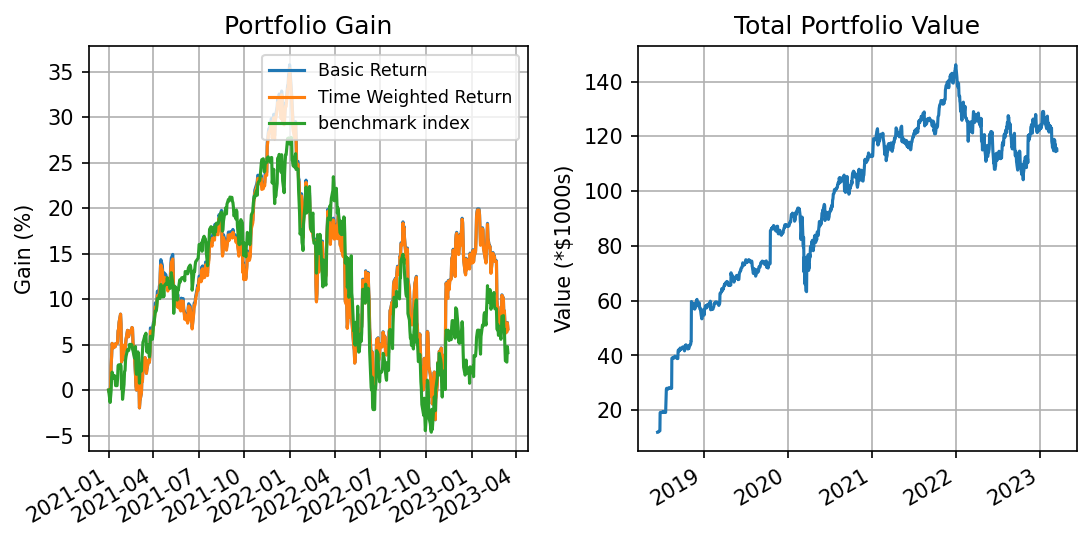

In [17]:
fig1 = graph.plot_portfolio_gain(val, cash_flows, price[index], date=start_date)

**Stock percentage gain over time**

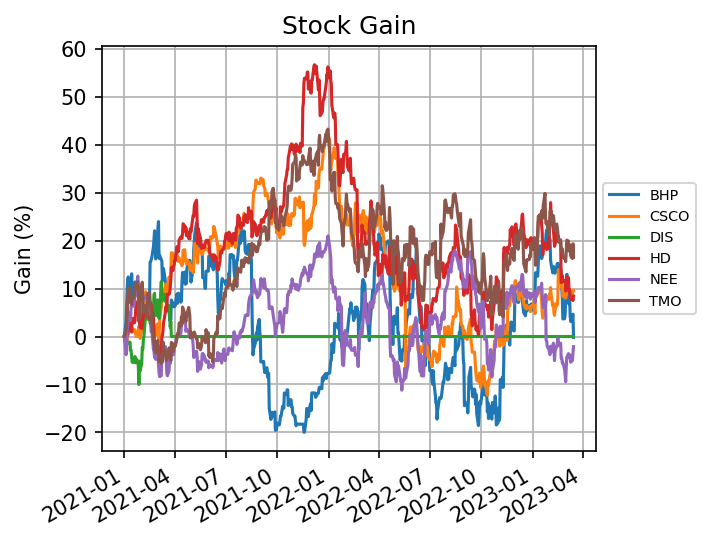

In [18]:
fig2 = graph.plot_stock_gain(val, cash_flows, date=start_date)

**Current Stock holdings**

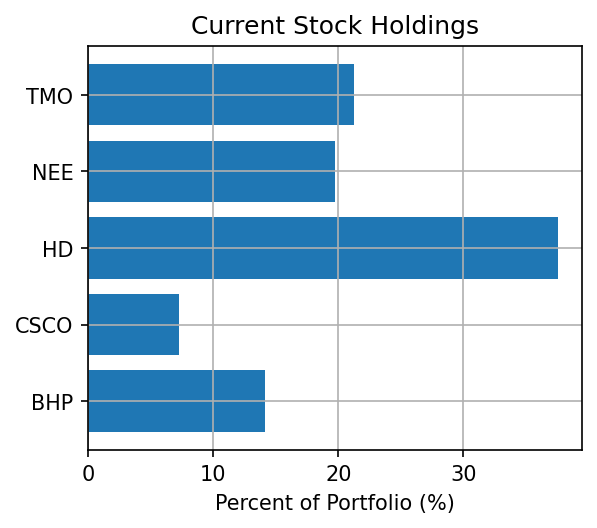

In [19]:
fig3 = graph.plot_stock_holdings(val, date=start_date)

**Annualised returns per stock**

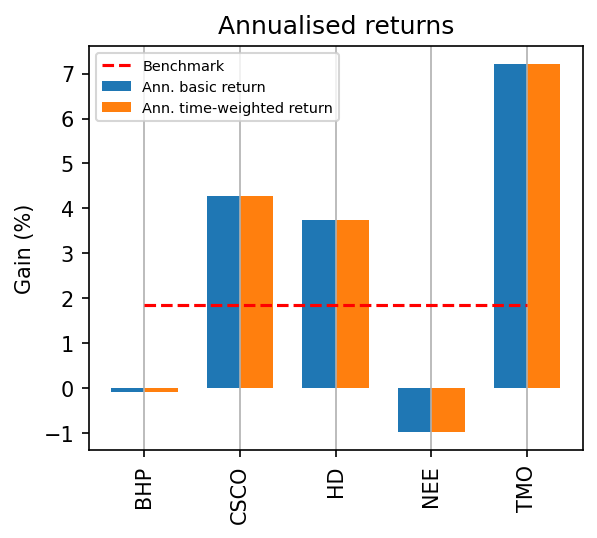

In [20]:
fig4 = graph.plot_annualised_return(val, cash_flows, price[index], date=start_date)